### Задание 2

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.    

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

### Доверительный интервал на основе нормального распределения
Используя ЦПТ

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [10]:
import numpy as np
import scipy.stats

In [7]:
alpha = 0.05
z = scipy.stats.norm.ppf(1 - alpha / 2)

In [24]:
n = 50
a = 1
p_a = a / n
p_a

0.02

In [11]:
left_boundary = p_a - z * np.sqrt(p_a * (1 - p_a) / n)
right_boundary = p_a + z * np.sqrt(p_a * (1 - p_a) / n)

In [14]:
print(f"Interval: [{left_boundary:.5f}, {right_boundary:.5f}]")

Interval: [-0.01881, 0.05881]


In [51]:
# из ответов
from statsmodels.stats.proportion import proportion_confint
proportion_confint(1, 50, method = 'normal')

(0.0, 0.05880530708179099)

### Задание 3
В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки. 

### Доверительный интервал Уилсона
Улучшение предыдущего метода. Позваоляет получать качественные оценки в крайних случаях, т.е. когда доля близка к 0 или к 1. И когда выборка довольно мала.      


$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$

In [15]:
big_sqrt = np.sqrt(p_a * (1 - p_a) / n + z ** 2 / (4 * n ** 2))

left_boundary_w = 1 / (1 + z ** 2 / n) * (p_a + z ** 2 / (2 * n) - z * big_sqrt)
right_boundary_w = 1 / (1 + z ** 2 / n) * (p_a + z ** 2 / (2 * n) + z * big_sqrt)

In [23]:
print(f"Interval: [{left_boundary_w:.5f}, {right_boundary_w:.5f}]")

Interval: [0.00354, 0.10495]


In [52]:
# из ответов
from statsmodels.stats.proportion import proportion_confint
proportion_confint(1, 50, method = 'wilson')

(0.003539259271646236, 0.10495443589637815)

### Задание 5
Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

In [25]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [47]:
n_samples = samplesize_confint_proportion(proportion=p_a, half_length=0.01, alpha=0.05)
n_samples

752.9259288560489

### Задание 6
Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью ±0.01 на уровне доверия 95%, от неизвестного параметра p. Посмотрите, при каком значении p нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком p, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?  

In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
p_range = np.linspace(start=0, stop=1, num=21) 

In [48]:
n_samples_range = [samplesize_confint_proportion(proportion=p, half_length=0.01, alpha=0.05) for p in p_range]

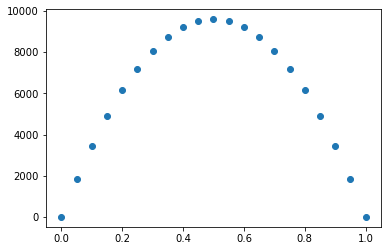

In [49]:
plt.plot(p_range, n_samples_range, 'o')

In [50]:
max(n_samples_range)

9603.647051735317